# Overview


We will kick things off with an **in class** lecture on few more administrative things
* Groups
* The large-scale structure of the class
   * Networks and NLP
   * Exercises versus Assignments
   * The final project
* Other stuff (when lectures will be posted, etc)

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend showing up in class!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

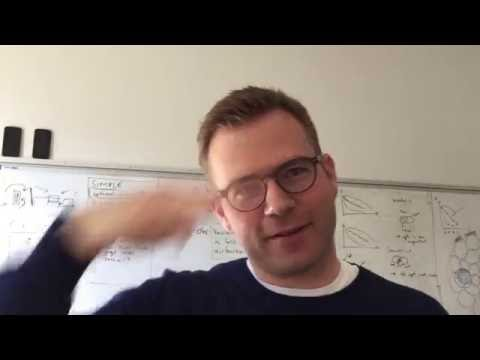

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("MMziC5xktHs",width=800, height=450) 
# Or use https://www.youtube.com/watch?v=MMziC5xktHs if the video isn't displaying

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can find the whole 
> thing for free [**here**](http://networksciencebook.com). 
>
> * Read chapter 2\.
> 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.


### Exercise: Real Networks and Sparsity (Chapter 2.5)

Section 2.5 of *Network Science* explains that **real networks are typically sparse**:  
even though each node may have many connections, the total number of observed links $(L)$ is still far smaller than the maximum possible number of links $(L_{\max} = N(N-1)/2)$ for an undirected network (or \(N(N-1)\) for a directed one).  
In other words, even “dense-looking” real networks usually occupy only a *tiny fraction* of the links that could theoretically exist.

---

**Example of a real network where nodes have many connections:**  
- **Airline transportation network.** Major airports like Atlanta (ATL), Chicago O’Hare (ORD), or London Heathrow (LHR) have direct flights to hundreds of other airports. These hubs appear to have *very high degree* compared to smaller regional airports.  

**Is this network still sparse? Why?**  
Yes, the global airline network is still considered **sparse**. The number of airports worldwide $((N \sim 10^4))$ is very large, and the maximum number of possible connections between them is on the order of $(N^2)$ (tens of millions). In reality, each airport connects to at most a few hundred destinations, which is large locally but still vanishing compared to $(N)$. Thus, the ratio $(L / L_{\max})$ remains very small, which means the network is sparse even though some nodes (major hubs) appear to be “highly connected.”  

---

**Key insight:**  
- Sparsity is about the *scaling* of the number of actual links relative to the maximum possible number.  
- Real-world networks, even when they contain hubs with many links (like airports, celebrities in social networks, or highly connected proteins in biological networks), are still sparse because the average degree $(\langle k \rangle)$ does **not** grow proportionally to the system size $(N)$. Instead, $(\langle k \rangle)$ tends to stay relatively small compared to $(N)$, so $(L \ll L_{max})$.  

# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book **using `NetworkX`**

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 
>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use `NetworkX`, but simple pen and paper).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-block diagonal" (all elements are away from the diagonal blocks). 
>     - *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipartite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).

### Königsberg-style icons (Image 2.19)

Rule (Euler):  
A drawing is possible **without lifting the pencil and without retracing** iff the underlying graph has  
- **0 odd-degree vertices** (Eulerian circuit), or  
- **exactly 2 odd-degree vertices** (Eulerian trail).

**a.** ✔️ Possible — vertices of odd degree: left and right (each degree 3). Top and bottom are degree 2. → exactly **2 odd** ⇒ Euler trail.

**b.** ❌ Not possible — all four tips (top, bottom, left, right) have degree 3. → **4 odd** ⇒ no Euler trail/circuit.

**c.** ✔️ Possible — Star of David: outer tips have degree 2; inner intersections have degree 4. → **0 odd** ⇒ Euler circuit.

**d.** ✔️ Possible — only two odd vertices: the intersection where the horizontal segment starts on the triangle side (degree 3) and the bottom end of the vertical segment (degree 1). All other intersections are even (2 or 4). → **2 odd** ⇒ Euler trail.

**Answer:** a, c, and d can be drawn as required; b cannot.

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
from itertools import product

# ----- Reconstruct the graphs from Image 2.20 (assumptions documented) -----
# (a) appears undirected with nodes 1..6, node 5 isolated.
# Visual inspection gives edges:
# 1-2 (top), 1-6, 6-3 (horizontal), 1-3 (diag), 1-4 (diag), 2-4 (vertical), 2-3 (right)
G_a = nx.Graph()
G_a.add_nodes_from(range(1,7))
edges_a = [(1,2),(1,6),(6,3),(1,3),(1,4),(2,4),(2,3)]
G_a.add_edges_from(edges_a)

# (b) is directed. From the figure we infer directions along existing undirected edges.
# We'll take the following oriented edges (matching arrows in the book figure):
# 6->1, 1->2, 6->3, 2->4, 2->3, 3->2, 4->1  (and keep 5 isolated).
G_b = nx.DiGraph()
G_b.add_nodes_from(range(1,7))
edges_b = [(6,1),(1,2),(6,3),(2,4),(2,3),(3,2),(4,1)]
G_b.add_edges_from(edges_b)

In [4]:
def adjacency_matrix_df(G):
    nodes = sorted(G.nodes())
    A = nx.to_numpy_array(G, nodelist=nodes, dtype=int)
    return pd.DataFrame(A, index=nodes, columns=nodes)

A_a = adjacency_matrix_df(G_a)
A_b = adjacency_matrix_df(G_b)

In [7]:
# Display adjacency matrices for G_a and G_b
print("Adjacency matrix for G_a:")
display(A_a)
print("Adjacency matrix for G_b:")
display(A_b)

Adjacency matrix for G_a:


,1,2,3,4,5,6
1,0,1,1,1,0,1
2,1,0,1,1,0,0
3,1,1,0,0,0,1
4,1,1,0,0,0,0
5,0,0,0,0,0,0
6,1,0,1,0,0,0


Adjacency matrix for G_b:


,1,2,3,4,5,6
1,0,1,0,0,0,0
2,0,0,1,1,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,0,0,0
6,1,0,1,0,0,0


In [8]:
# ----- (2) Link lists (L x 2) -----
links_a = pd.DataFrame(edges_a, columns=["i","j"])
links_b = pd.DataFrame(edges_b, columns=["i","j"])
# Display link lists
print("Link list for G_a:") 
display(links_a)
print("Link list for G_b:")
display(links_b)

Link list for G_a:


,i,j
0,1,2
1,1,6
2,6,3
3,1,3
4,1,4
5,2,4
6,2,3


Link list for G_b:


,i,j
0,6,1
1,1,2
2,6,3
3,2,4
4,2,3
5,3,2
6,4,1


In [9]:
# ----- (3) Average clustering coefficient of (a) -----
avg_C_a = nx.average_clustering(G_a)
print(f"Average clustering coefficient of G_a: {avg_C_a:.4f}")

Average clustering coefficient of G_a: 0.6389


In [ ]:
# ----- (4) Swap nodes 5 and 6 in (a) -----
mapping = {5:6, 6:5}
G_a_swapped = nx.relabel_nodes(G_a, mapping)
A_a_swapped = adjacency_matrix_df(G_a_swapped)
links_a_swapped = pd.DataFrame(sorted(G_a_swapped.edges()), columns=["i","j"])
print("Adjacency matrix for G_a with nodes 5 and 6 swapped:")
display(A_a_swapped)
print("Link list for G_a with nodes 5 and 6 swapped:")
display(links_a_swapped)

Adjacency matrix for G_a with nodes 5 and 6 swapped:


,1,2,3,4,5,6
1,0,1,1,1,1,0
2,1,0,1,1,0,0
3,1,1,0,0,1,0
4,1,1,0,0,0,0
5,1,0,1,0,0,0
6,0,0,0,0,0,0


Link list for G_a with nodes 5 and 6 swapped:


,i,j
0,1,2
1,1,3
2,1,4
3,1,5
4,2,3
5,2,4
6,3,5


### 4) Swap the labels of nodes 5 and 6 in Image 2.20a

Swapping labels \(5 \leftrightarrow 6\):

- **Adjacency matrix:** see **“Adjacency matrix after swapping 5 and 6 (a)”**.  
  - Effect: rows/columns **5** and **6** are exchanged. (Only labels move; structure is unchanged.)
- **Link list:** see **“Link list after swapping 5 and 6 (a)”**.  
  - Effect: every occurrence of **6** becomes **5** and vice versa.

### 5) What can’t you infer from a link list that you can from an adjacency matrix?

A plain $(L\times 2)$ link list **does not explicitly encode non-edges**; you only see which pairs are linked, not which pairs are *absent*. The adjacency matrix encodes **both** links (1s) **and non-links** (0s) and therefore supports algebraic operations (e.g., powers $(A^k)$ to count walks of length $(k)$) directly. With a link list you can recover this, but only after building the matrix or equivalent structure.

In [11]:
# ----- (5) Paths of length 3 from node 1 to node 3 -----
# For allowing repeated nodes/edges, count walks (A^3)[1,3].
def count_length_k_walks(G, src, dst, k):
    nodes = sorted(G.nodes())
    idx = {n:i for i,n in enumerate(nodes)}
    A = nx.to_numpy_array(G, nodelist=nodes, dtype=int)
    Ak = np.linalg.matrix_power(A, k)
    return int(Ak[idx[src], idx[dst]])

walks_a = count_length_k_walks(G_a, 1, 3, 3)
walks_b = count_length_k_walks(G_b, 1, 3, 3)

avg_C_a, walks_a, walks_b

(0.6388888888888888, 7, 0)

In [12]:
# ----- Reconstruct the bipartite graph from the figure -----
# Top (purple) nodes U = {1..6}; Bottom (green) nodes V = {7..11}
U = [1,2,3,4,5,6]
V = [7,8,9,10,11]

# Edges inferred from the drawing (only across the two sets):
edges = [
    (1,7),
    (2,7), (2,9),
    (3,8), (3,9),
    (4,9), (4,10),
    (5,9), (5,11),
    (6,11),
]

B = nx.Graph()
B.add_nodes_from(U, bipartite=0)  # purple set
B.add_nodes_from(V, bipartite=1)  # green set
B.add_edges_from(edges)

In [13]:
# Utility to build an adjacency matrix with node order U then V
def adj_df(G, order):
    A = nx.to_numpy_array(G, nodelist=order, dtype=int)
    return pd.DataFrame(A, index=order, columns=order)

order_uv = U + V
A_bip = adj_df(B, order_uv)
print("Adjacency matrix for the bipartite graph B:")
display(A_bip)

Adjacency matrix for the bipartite graph B:


,1,2,3,4,5,6,7,8,9,10,11
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,1
7,1,1,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0
9,0,1,1,1,1,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,0


In [14]:
# ----- Projections -----
from networkx.algorithms import bipartite

G_U, G_V = bipartite.projected_graph(B, U), bipartite.projected_graph(B, V)

A_U = adj_df(G_U, U)
A_V = adj_df(G_V, V)

print("Adjacency matrix for the projected graph G_U:")
display(A_U)

print("Adjacency matrix for the projected graph G_V:")
display(A_V)

Adjacency matrix for the projected graph G_U:


,1,2,3,4,5,6
1,0,1,0,0,0,0
2,1,0,1,1,1,0
3,0,1,0,1,1,0
4,0,1,1,0,1,0
5,0,1,1,1,0,1
6,0,0,0,0,1,0


Adjacency matrix for the projected graph G_V:


,7,8,9,10,11
7,0,0,1,0,0
8,0,0,1,0,0
9,1,1,0,1,1
10,0,0,1,0,0
11,0,0,1,0,0


In [15]:
# ----- Average degrees in the bipartite graph -----
deg_U = [B.degree(n) for n in U]
deg_V = [B.degree(n) for n in V]
avg_deg_U = sum(deg_U)/len(deg_U)
avg_deg_V = sum(deg_V)/len(deg_V)

# ----- Average degrees in the two projections -----
avg_deg_proj_U = sum(dict(G_U.degree()).values())/len(U)
avg_deg_proj_V = sum(dict(G_V.degree()).values())/len(V)

avg_deg_U, avg_deg_V, avg_deg_proj_U, avg_deg_proj_V

(1.6666666666666667, 2.0, 2.6666666666666665, 1.6)

### (a) Adjacency matrix of the bipartite graph
See the table **“Adjacency matrix of the bipartite graph (order: 1..6, 7..11)”**.

**Why “(anti-)block diagonal”?**  
With the node order $(U)$ **then** V, the $(U\!\times\!U)$ and $(V\!\times\!V)$ blocks on the **main diagonal** are all zeros (no within-set edges in a bipartite graph). All nonzeros appear only in the **off-diagonal** blocks $((U\!\leftrightarrow\!V))$. That is, the matrix has the anti-block-diagonal structure you noted.

---

### (b) Adjacency matrices of the two projections
- **Purple projection (U-on-U)**: connect two purple nodes if they share at least one green neighbor.  
  See **“Adjacency matrix of purple-node projection (U on U)”**.
- **Green projection (V-on-V)**: connect two green nodes if they share at least one purple neighbor.  
  See **“Adjacency matrix of green-node projection (V on V)”**.

---

### (c) Average degree in the bipartite network
From the reconstructed graph:
- Average degree of **purple** nodes: $(boxed{\langle k_U\rangle \approx 1.667})$
- Average degree of **green** nodes: $(boxed{\langle k_V\rangle = 2.0})$

(They satisfy $( |U|\langle k_U\rangle = |V|\langle k_V\rangle = 10 )$ — both equal to the number of edges, as expected for bipartite graphs.)

---

### (d) Average degree in each projection
- **Purple projection:** $(\boxed{\langle k\rangle_U^{text{proj}} \approx 2.667})$
- **Green projection:** $(\boxed{\langle k\rangle_V^{\text{proj}} = 1.6})$

These **differ** from the bipartite averages in (c), which is not surprising:  
projections add edges between same-set nodes whenever they share a neighbor, which (i) changes the number of possible neighbors, and (ii) can create dense cliques around popular opposite-set nodes (e.g., all purple nodes attached to node 9 become mutually connected in the purple projection). Hence degrees generally increase (often substantially) in projections relative to the original bipartite degrees.

---

> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

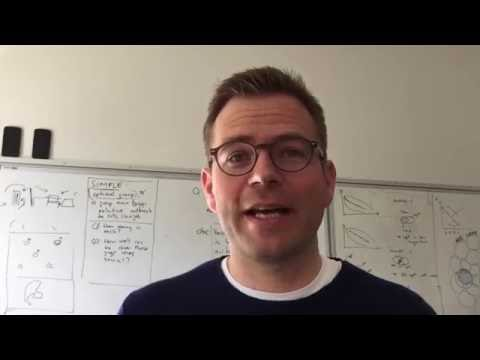

In [5]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450) 
# https://www.youtube.com/watch?v=iDlb9On_TDQ

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.


**And don't just use the built-in binning functions. That misses the point. Instead follow the exercise carefully**. 

> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simply specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

### Binning real number
**Takeaway**:
When your data are continuous, you need to decide on bin boundaries. The histogram is an approximation of the underlying probability distribution.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

# --- Generate 5000 Gaussian samples with mu=2, sigma=0.125 using the `random` library ---
random.seed(42)  # for reproducibility
mu, sigma, n = 2.0, 0.125, 5000
data = [random.gauss(mu, sigma) for _ in range(n)]

# --- Bin with numpy.histogram into 10 bins ---
counts, bin_edges = np.histogram(data, bins=10)

# Show what numpy.histogram returned and their lengths
print("numpy.histogram returns:")
print(" - counts (length {}):".format(len(counts)), counts)
print(" - bin_edges (length {}):".format(len(bin_edges)), bin_edges)

numpy.histogram returns:
 - counts (length 10): [   3   35  215  732 1353 1420  864  308   59   11]
 - bin_edges (length 11): [1.50784068 1.60395734 1.70007401 1.79619068 1.89230734 1.98842401
 2.08454068 2.18065734 2.27677401 2.37289068 2.46900734]


In [9]:
# --- Deal with the different lengths for plotting ---
# counts has length = number of bins (10); bin_edges has length = number of bins + 1 (11).
# To plot with matplotlib.pyplot.plot(x, y), we need x and y to be the same length.
# We compute the bin centers from the edges so we have 10 x-values to match the 10 counts.
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

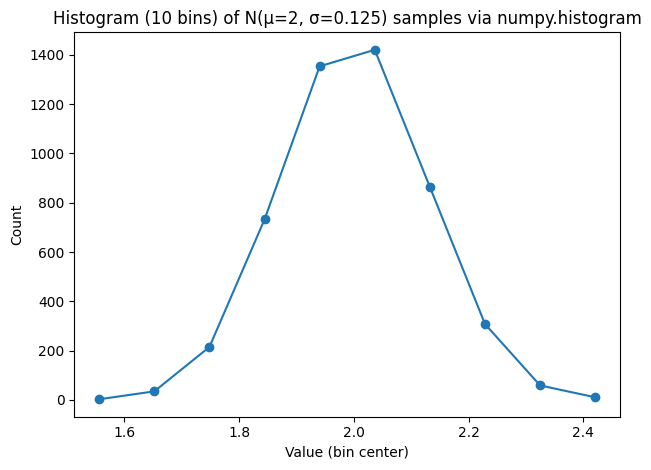

In [10]:
# --- Plot the binned data using line/point plot ---
plt.figure()
plt.plot(bin_centers, counts, marker='o')
plt.title("Histogram (10 bins) of N(μ=2, σ=0.125) samples via numpy.histogram")
plt.xlabel("Value (bin center)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Binning integers (Poisson example)
**Takeaway**:
For discrete data, you shouldn’t let NumPy choose arbitrary bins. Instead, you align bins with integer values to capture the distribution correctly.

In [11]:
# --- Generate 5000 Poisson(λ=10) integers ---
rng = np.random.default_rng(seed=42)
lam, n = 10, 5000
x = rng.poisson(lam=lam, size=n)

# --- Find min and max ---
xmin, xmax = int(x.min()), int(x.max())

# --- Build a bin-edge vector v so each integer has its own bin ---
# Using half-integer edges: [xmin-0.5, xmin+0.5, xmin+1.5, ..., xmax+0.5]
v = np.arange(xmin - 0.5, xmax + 1.5, 1.0)

# --- Histogram with explicit bins ---
counts, edges = np.histogram(x, bins=v)

# --- Sanity checks ---
sum_counts = counts.sum()
unique_integers = np.arange(xmin, xmax + 1)

print(f"λ = {lam}, n = {n}")
print(f"min = {xmin}, max = {xmax}")
print("First/last of v (bin edges):", v[0], v[-1])
print("Length of counts:", len(counts), "| Length of unique integers:", len(unique_integers))
print("Sum over bin counts:", sum_counts)

λ = 10, n = 5000
min = 0, max = 22
First/last of v (bin edges): -0.5 22.5
Length of counts: 23 | Length of unique integers: 23
Sum over bin counts: 5000


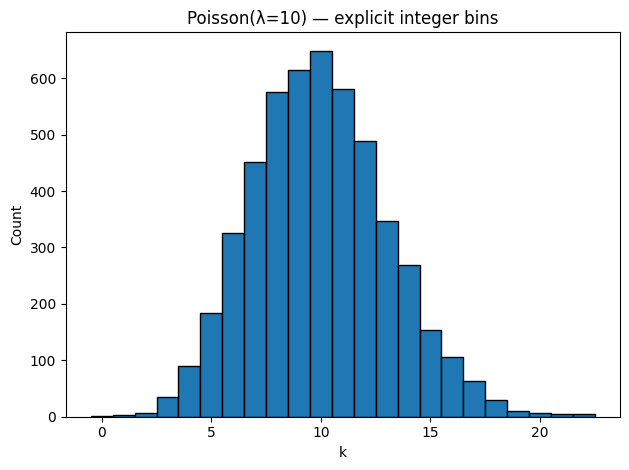

In [12]:
# --- Plot as a bar chart (integer on x-axis, count on y-axis) ---
plt.figure()
plt.bar(unique_integers, counts, width=1.0, align='center', edgecolor='black')
plt.xlabel("k")
plt.ylabel("Count")
plt.title("Poisson(λ=10) — explicit integer bins")
plt.tight_layout()
plt.show()

### Degree distributions (Erdős–Rényi network)
**Takeaway**:
- You’re connecting probability distributions (like Poisson) to real network models.
- You see how abstract probability theory actually predicts structural properties of random graphs.
- You also learn that when data are discrete (like degrees), binning needs to respect integer values.

In [13]:
# --- Choose ER parameters so that <k> = 10 ---
N = 5000
k_target = 10
p = k_target / (N - 1)  # because <k> = p (N-1)

# --- Generate ER graph and extract degrees ---
seed = 42
G = nx.gnp_random_graph(N, p, seed=seed, directed=False)
degrees = np.array([d for _, d in G.degree()], dtype=int)

# --- Manual integer binning: one bin per degree value ---
dmin, dmax = int(degrees.min()), int(degrees.max())
deg_values = np.arange(dmin, dmax + 1)                 # x positions (integers)
edges = np.arange(dmin - 0.5, dmax + 1.5, 1.0)         # half-integer bin edges
counts, _ = np.histogram(degrees, bins=edges)

# --- Quick sanity checks ---
assert counts.sum() == N

print(f"N = {N}, target <k> = {k_target}, p = {p:.6f}")
print(f"Observed average degree: {degrees.mean():.3f}")
print(f"min degree = {dmin}, max degree = {dmax}")

N = 5000, target <k> = 10, p = 0.002000
Observed average degree: 9.856
min degree = 0, max degree = 24


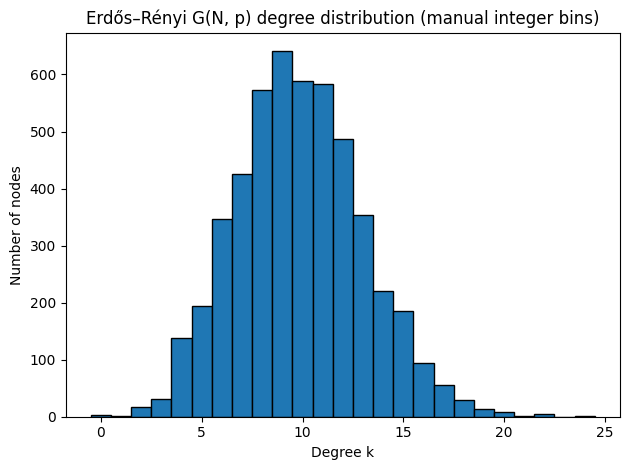

In [14]:
# --- Plot the empirical degree distribution as a bar chart ---
plt.figure()
plt.bar(deg_values, counts, width=1.0, align='center', edgecolor='black')
plt.xlabel("Degree k")
plt.ylabel("Number of nodes")
plt.title("Erdős–Rényi G(N, p) degree distribution (manual integer bins)")
plt.tight_layout()
plt.show()

# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

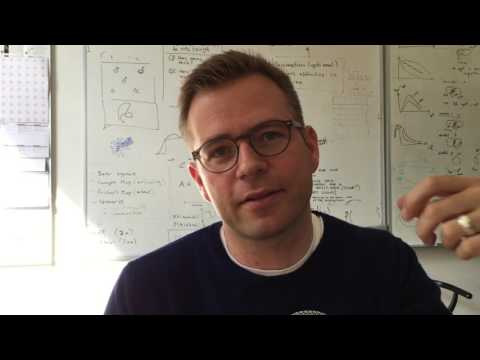

In [4]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450) 
# https://www.youtube.com/watch?v=c_SbQCzgqb0

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

### Erdős-Rényi Networks
We consider an Erdős-Rényi network with the following parameters:

- Number of nodes: $N = 3000$  
- Connection probability: $p = 10^{-3}$

In [15]:
from scipy.optimize import fsolve
from scipy.special import factorial
import matplotlib.pyplot as plt

# Initial network parameters
N = 3000
p = 1e-3

### a. What is the expected number of links, ⟨L⟩?

The expected number of links in a random network is the product of the total number of possible links, $\frac{N(N-1)}{2}$, and the probability $p$ that any two nodes are connected. The formula is:

$[
\langle L \rangle = p \cdot \frac{N(N-1)}{2}
]$

In [16]:
# a. Calculate the expected number of links
expected_L = p * (N * (N - 1)) / 2
print(f"a. The expected number of links is: {expected_L}")

a. The expected number of links is: 4498.5


### b. In which regime is the network?

The behavior of a random network is characterized by its average degree, $\langle k \rangle$.

From *Network Science* (Section 3.6), we distinguish four regimes:

- **Subcritical Regime:** $0 < \langle k \rangle < 1$ → many tiny, disconnected components.  
- **Critical Point:** $\langle k \rangle = 1$ → giant component emerges.  
- **Supercritical Regime:** $1 < \langle k \rangle < \ln N$ → giant component + smaller components.  
- **Connected Regime:** $\langle k \rangle \geq \ln N$ → single connected network.

We calculate the average degree:

$[
\langle k \rangle = p \cdot (N - 1)
]$

Then compare it with thresholds $1$ and $\ln N$.

In [17]:
# b. Determine the network regime
avg_k = p * (N - 1)
ln_N = np.log(N)

print(f"Average degree <k> = {avg_k:.4f}")
print(f"Natural log of N, ln(N) = {ln_N:.4f}")

if avg_k < 1:
    regime = "Subcritical"
elif avg_k == 1:
    regime = "Critical"
elif 1 < avg_k < ln_N:
    regime = "Supercritical"
else: # avg_k >= ln_N
    regime = "Connected"

print(f"\nb. Since 1 < <k> < ln(N), the network is in the {regime} regime.")

Average degree <k> = 2.9990
Natural log of N, ln(N) = 8.0064

b. Since 1 < <k> < ln(N), the network is in the Supercritical regime.


### c. Critical probability $p_c$

The critical point for the emergence of a giant component occurs when the average degree equals 1:

$[
\langle k \rangle = p_c \cdot (N - 1) = 1
]$

Thus:

$[
p_c = \frac{1}{N-1}
]$

In [18]:
# c. Calculate the critical probability pc
p_c = 1 / (N - 1)

print(f"c. The critical probability p_c is: {p_c:.6f}")

c. The critical probability p_c is: 0.000333


### d. Critical number of nodes $N_{cr}$ for $p = 10^{-3}$

A random network becomes fully connected when the average degree exceeds $\ln N$.  
The transition occurs when:

$[
\langle k \rangle = p (N_{cr} - 1) = \ln(N_{cr})
]$

This transcendental equation can be solved numerically for $N_{cr}$.

In [20]:
def f_Ncr(Ncr, p_val):
    return p_val * (Ncr - 1) - np.log(Ncr)

# Provide an initial guess for the solver
initial_guess = N * 3 # A guess based on the original N
N_cr = fsolve(f_Ncr, initial_guess, args=(p))[0]

print(f"d. The critical number of nodes N_cr is approximately: {N_cr:.2f}")
print(f"This means a network with p={p} needs about {int(round(N_cr))} nodes to become fully connected.")

d. The critical number of nodes N_cr is approximately: 9119.13
This means a network with p=0.001 needs about 9119 nodes to become fully connected.


### e. Average degree ⟨k_cr⟩ at $N_{cr}$

By definition at the connectivity threshold:

$[
\langle k_{cr} \rangle = \ln(N_{cr})
]$

In [21]:
# e. Calculate critical average degree and average distance

# The average degree is at the transition point
avg_k_cr = np.log(N_cr)

# The average distance using the small-world formula
avg_d_cr = np.log(N_cr) / np.log(avg_k_cr)

print(f"e. For the critical network with N_cr ≈ {N_cr:.2f}:")
print(f"   The average degree <k_cr> is: {avg_k_cr:.4f}")
print(f"   The average distance <d> is: {avg_d_cr:.4f}")

e. For the critical network with N_cr ≈ 9119.13:
   The average degree <k_cr> is: 9.1181
   The average distance <d> is: 4.1254


### f. Degree distribution $p_k$

For large $N$ and small $p$, the binomial degree distribution can be approximated by a **Poisson distribution** with mean $\langle k \rangle$:

$[
p_k = e^{-\langle k \rangle} \frac{\langle k \rangle^k}{k!}
]$

We calculate the degree distribution for:

- The original network ($N=3000$, $p=10^{-3}$, $\langle k \rangle \approx 3$).  
- The critical network with $N_{cr}$ nodes ($\langle k_{cr} \rangle = \ln(N_{cr})$).


f. Degree distribution p_k for <k> = 2.999:

   p(k=0) = 0.04984
   p(k=1) = 0.14946
   p(k=2) = 0.22412
   p(k=3) = 0.22404
   p(k=4) = 0.16798
   p(k=5) = 0.10075
   p(k=6) = 0.05036
   p(k=7) = 0.02158


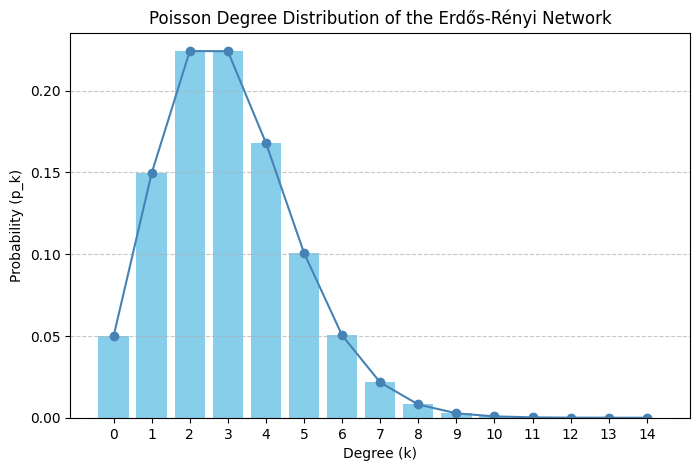

In [22]:
# f. Calculate the Poisson degree distribution for the original network

# The average degree of the original network
avg_k_original = p * (N - 1)

def poisson_pk(k, avg_k):
    """Calculates the Poisson probability for a given degree k and average degree avg_k."""
    return np.exp(-avg_k) * (avg_k**k) / factorial(k)

# Example: Calculate pk for several values of k
print(f"f. Degree distribution p_k for <k> = {avg_k_original:.3f}:\n")
for k_val in range(8):
    prob = poisson_pk(k_val, avg_k_original)
    print(f"   p(k={k_val}) = {prob:.5f}")

# Plot the distribution
k_values = np.arange(0, 15)
pk_values = poisson_pk(k_values, avg_k_original)

plt.figure(figsize=(8, 5))
plt.bar(k_values, pk_values, color='skyblue')
plt.plot(k_values, pk_values, 'o-', color='steelblue')
plt.title('Poisson Degree Distribution of the Erdős-Rényi Network')
plt.xlabel('Degree (k)')
plt.ylabel('Probability (p_k)')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 1. Create and Plot a Random Network
First, we'll create an Erdős-Rényi random network with 200 nodes and an average degree of 1.5. To do this, we need to calculate the probability p required by the `networkx.erdos_renyi_graph` function, using the formula  
$\langle k \rangle = p (N-1)$.

Then, we'll draw the network. As suggested, we'll use a small `node_size` to keep the visualization clean.


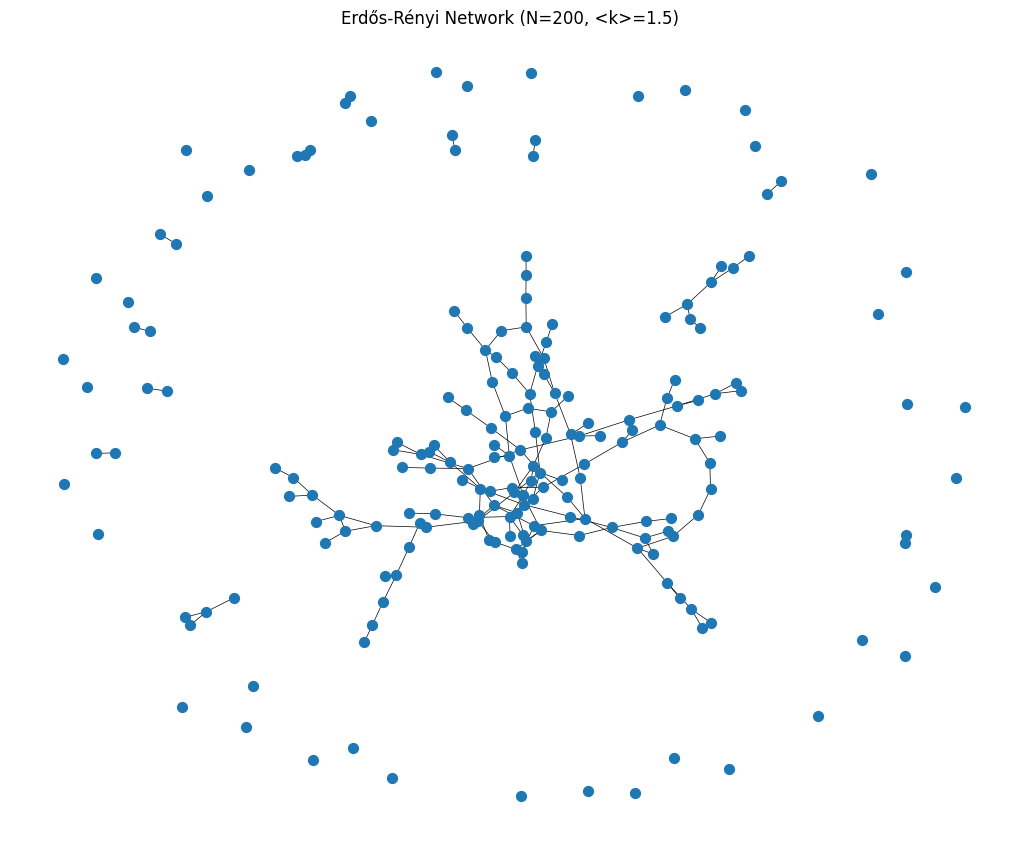

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# --- 1. Create and Plot a Random Network ---

# Parameters
N = 200
avg_degree = 1.5

# Calculate probability p
p = avg_degree / (N - 1)

# Create the Erdős-Rényi graph
G = nx.erdos_renyi_graph(N, p)

# Plot the graph
plt.figure(figsize=(10, 8))
nx.draw(G, node_size=50, width=0.5)
plt.title("Erdős-Rényi Network (N=200, <k>=1.5)")
plt.show()


### 2. Extract the Giant Connected Component (GCC)
The network created above is likely disconnected because the average degree is in the supercritical regime ($1 < \langle k \rangle < \ln(200) \approx 5.3$). We need to find the largest connected component, often called the Giant Connected Component (GCC). We can do this by finding all connected components, sorting them by size, and selecting the largest one.


In [24]:
# --- 2. Extract the Giant Connected Component (GCC) ---

# Find all connected components and sort them by size
connected_components = sorted(nx.connected_components(G), key=len, reverse=True)

# The GCC is the largest component
gcc_nodes = connected_components[0]
GCC = G.subgraph(gcc_nodes).copy()

print(f"The original graph has {G.number_of_nodes()} nodes.")
print(f"The Giant Connected Component (GCC) has {GCC.number_of_nodes()} nodes.")


The original graph has 200 nodes.
The Giant Connected Component (GCC) has 122 nodes.


### 3. Choose a Random Node and Find Neighbors at 2 Steps
Next, we will select a random starting node from within the GCC. Then, using that node as the source, we'll find all other nodes in the GCC that are exactly two steps away.


In [25]:
# --- 3. Choose a Random Node and Find Neighbors at 2 Steps ---

# Choose a random node from the GCC
# Convert set of nodes to a list to use random.choice
gcc_node_list = list(GCC.nodes())
start_node = random.choice(gcc_node_list)

# Find shortest path lengths from the start_node to all other nodes in the GCC
path_lengths = nx.single_source_shortest_path_length(GCC, start_node)

# Find all nodes that are exactly 2 steps away
nodes_at_2_steps = [node for node, length in path_lengths.items() if length == 2]

print(f"Randomly chosen start node: {start_node}")
print(f"Nodes exactly 2 steps away from node {start_node}:")
print(nodes_at_2_steps)


Randomly chosen start node: 117
Nodes exactly 2 steps away from node 117:
[156, 180]


### 4. Plot the GCC with Custom Colors
Finally, we'll visualize the GCC, coloring the nodes according to the specified rules:

- **Starting node:** Black  
- **Nodes 2 steps away:** Red  
- **All other nodes:** Blue  

We'll create a color list that corresponds to the nodes in the GCC and pass it to the `nx.draw()` function.


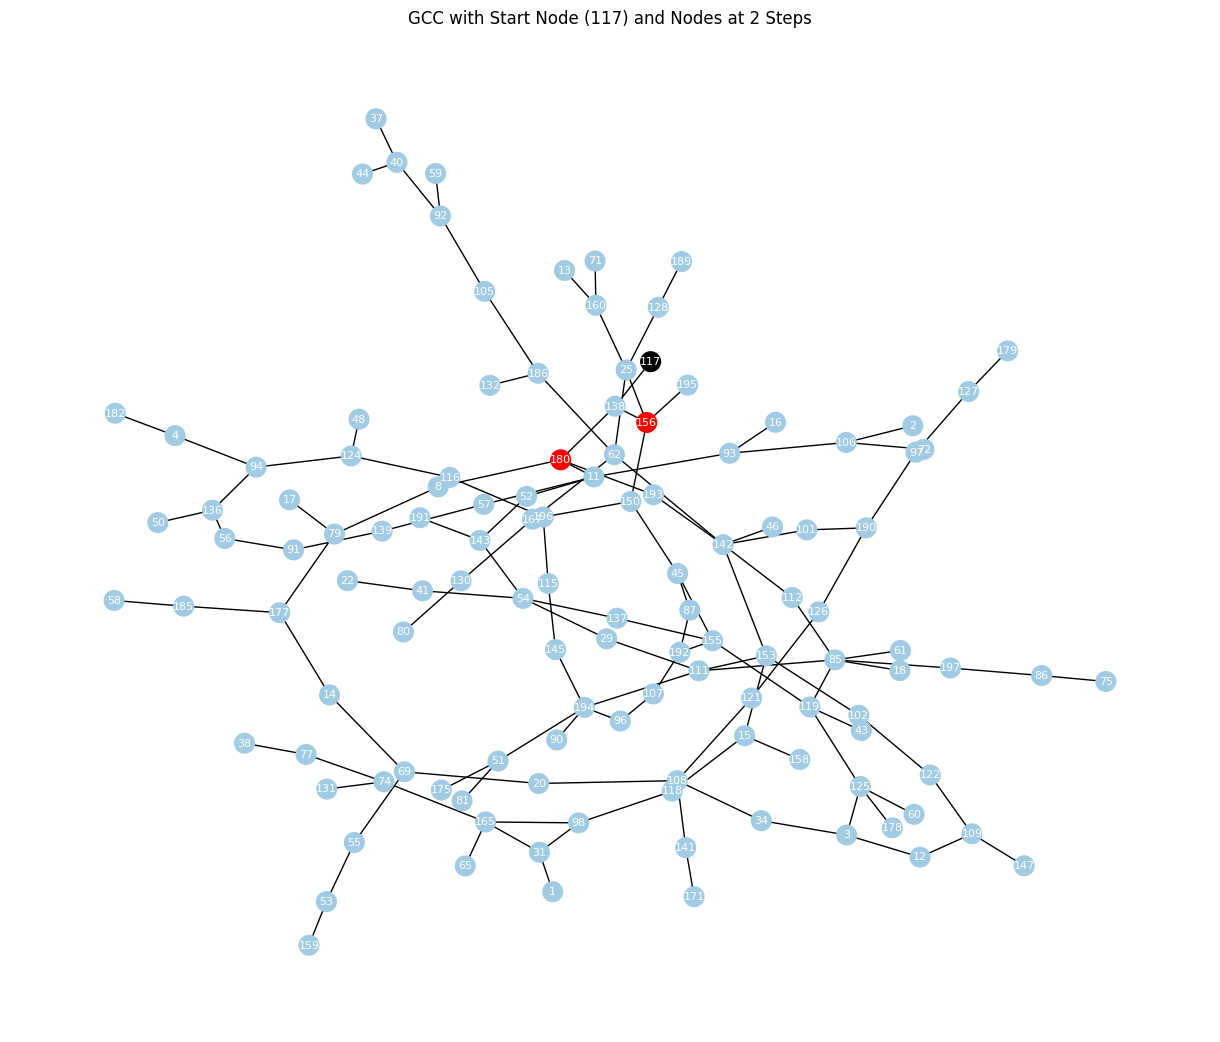

In [26]:
# --- 4. Plot the GCC with Custom Colors ---

# Create a color map for the nodes in the GCC
node_colors = []
for node in GCC.nodes():
    if node == start_node:
        node_colors.append("#000000")  # Black
    elif node in nodes_at_2_steps:
        node_colors.append("#ff0000")  # Red
    else:
        node_colors.append("#A0CBE2")  # Blue

# Use a spring layout for better visualization
pos = nx.spring_layout(GCC, seed=42)

# Plot the GCC with specified colors
plt.figure(figsize=(12, 10))
nx.draw(
    GCC,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=200,
    font_size=8,
    font_color='white'
)
plt.title(f"GCC with Start Node ({start_node}) and Nodes at 2 Steps")
plt.show()
